In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To display plots inside the notebook
%matplotlib inline

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Load the dataset
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Show first 5 rows to understand the structure
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Check basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Get basic statistics for numeric columns
df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# Check the number of missing values in each column
df.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# 1️⃣ Check if there are any blank spaces instead of NaN
df.replace(" ", np.nan, inplace=True)

# 2️⃣ Convert 'TotalCharges' to numeric (it might be object type)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 3️⃣ Check missing values again after conversion
df.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# Fill missing TotalCharges with median value
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

# Double-check to confirm there are no missing values left
df.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# Create TenureGroup column
def tenure_group(tenure):
    if tenure <= 12:
        return "0-12 months"
    elif tenure <= 24:
        return "13-24 months"
    elif tenure <= 48:
        return "25-48 months"
    elif tenure <= 60:
        return "49-60 months"
    else:
        return "60+ months"

df["TenureGroup"] = df["tenure"].apply(tenure_group)

# Create AvgMonthlySpend column
df["AvgMonthlySpend"] = df["TotalCharges"] / df["tenure"]
df["AvgMonthlySpend"].replace([float('inf'), None], 0, inplace=True)

# Show first few rows to confirm
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,AvgMonthlySpend
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 months,29.850000
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,25-48 months,55.573529
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 months,54.075000
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,25-48 months,40.905556
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 months,75.825000


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Copy original dataframe to avoid overwriting
df_encoded = df.copy()

# Label Encode binary columns (Yes/No, Male/Female)
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
               'PaperlessBilling', 'Churn']

le = LabelEncoder()
for col in binary_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# One-Hot Encode categorical columns with multiple categories
df_encoded = pd.get_dummies(df_encoded,
                            columns=['InternetService', 'Contract',
                                     'PaymentMethod', 'TenureGroup'],
                            drop_first=True)

# Show the new dataset
df_encoded.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_13-24 months,TenureGroup_25-48 months,TenureGroup_49-60 months,TenureGroup_60+ months
0,7590-VHVEG,0,0,1,0,1,0,No phone service,No,Yes,...,False,False,False,False,True,False,False,False,False,False
1,5575-GNVDE,1,0,0,0,34,1,No,Yes,No,...,False,True,False,False,False,True,False,True,False,False
2,3668-QPYBK,1,0,0,0,2,1,No,Yes,Yes,...,False,False,False,False,False,True,False,False,False,False
3,7795-CFOCW,1,0,0,0,45,0,No phone service,Yes,No,...,False,True,False,False,False,False,False,True,False,False
4,9237-HQITU,0,0,0,0,2,1,No,No,No,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
import pandas as pd
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing TotalCharges with the median value
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Replace Yes/No with 1/0
df.replace({'Yes': 1, 'No': 0}, inplace=True)

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

# Display the first few rows of the encoded dataset
df_encoded.head()


/tmp/ipython-input-1421626655.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
/tmp/ipython-input-1421626655.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Yes': 1, 'No': 0}, inplace=True)


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,customerID_0003-MKNFE,...,TechSupport_No internet service,StreamingTV_1,StreamingTV_No internet service,StreamingMovies_1,StreamingMovies_No internet service,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,False,...,False,False,False,False,False,False,False,False,True,False
1,0,0,0,34,1,0,56.95,1889.50,0,False,...,False,False,False,False,False,True,False,False,False,True
2,0,0,0,2,1,1,53.85,108.15,1,False,...,False,False,False,False,False,False,False,False,False,True
3,0,0,0,45,0,0,42.30,1840.75,0,False,...,False,False,False,False,False,True,False,False,False,False
4,0,0,0,2,1,1,70.70,151.65,1,False,...,False,False,False,False,False,False,False,False,True,False


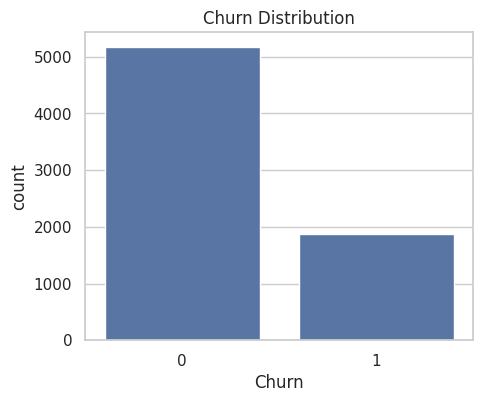

In [ ]:
# 1️⃣ Countplot for Churn distribution
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")
plt.show()


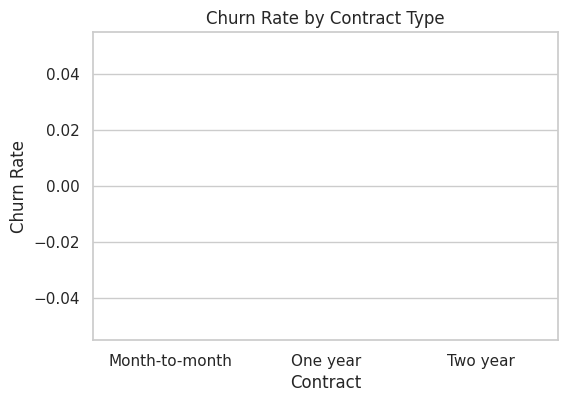

In [ ]:
# 2️⃣ Barplot - Contract vs Churn
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Contract', y=df['Churn'].map({'Yes':1, 'No':0}))
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate")
plt.show()


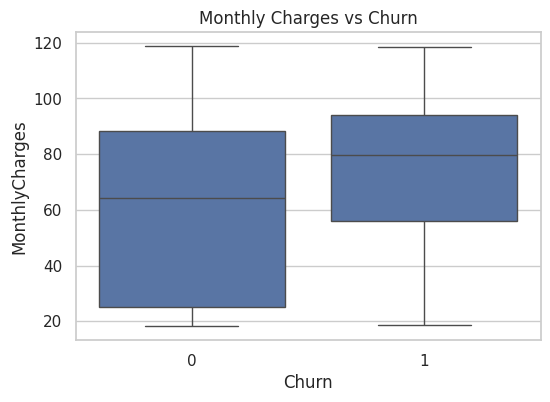

In [ ]:
# 3️⃣ Boxplot - Monthly Charges vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title("Monthly Charges vs Churn")
plt.show()


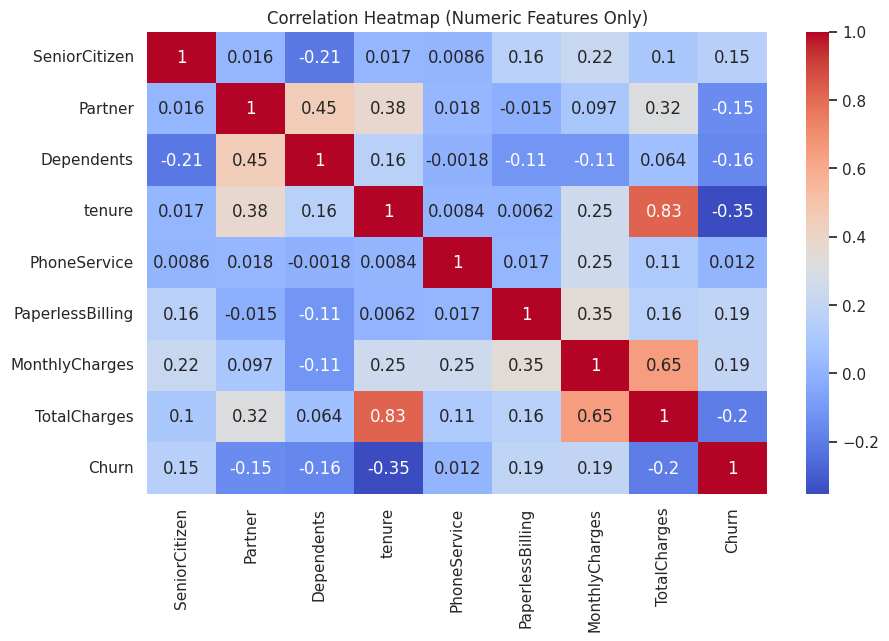

In [ ]:
# 4️⃣ Correlation heatmap for numeric columns (fixed)
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


In [2]:
import pandas as pd

df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le = LabelEncoder()

for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


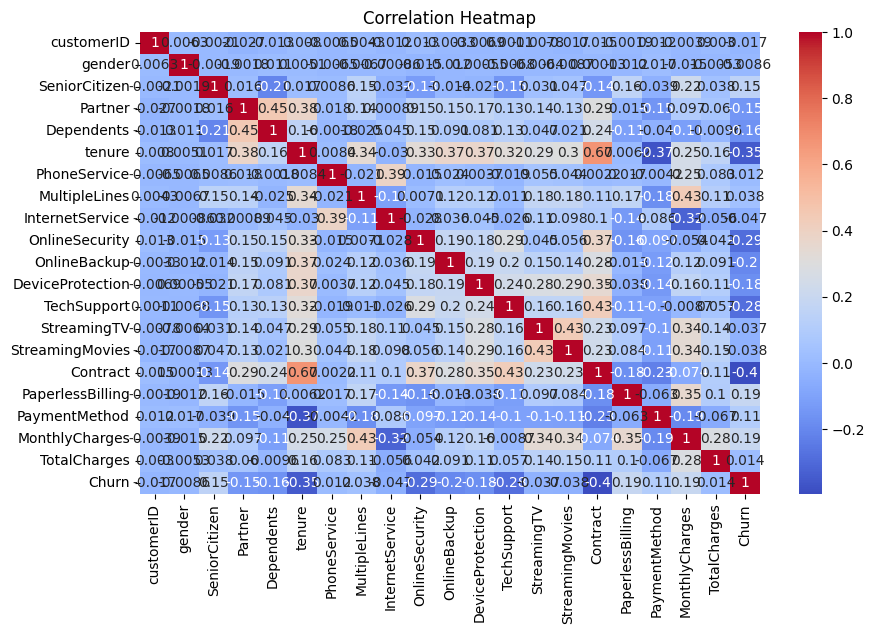

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [5]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (5634, 20)
Testing set shape: (1409, 20)


In [7]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression(max_iter=2000, solver='lbfgs')
model.fit(X_train, y_train)


print("✅ Model training completed!")



✅ Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
# Step 10: Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predictions
y_pred = model.predict(X_test)

# Accuracy
print("✅ Model Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))


✅ Model Accuracy: 0.8140525195173882

📊 Confusion Matrix:
 [[937  99]
 [163 210]]

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.56      0.62       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409



<Figure size 500x400 with 0 Axes>

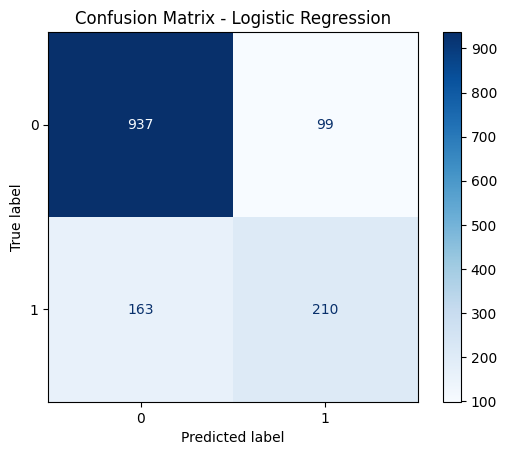

In [9]:
# Step 11: Visualize Model Performance

from sklearn.metrics import ConfusionMatrixDisplay

# Plot Confusion Matrix
plt.figure(figsize=(5,4))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


/tmp/ipython-input-3913742627.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


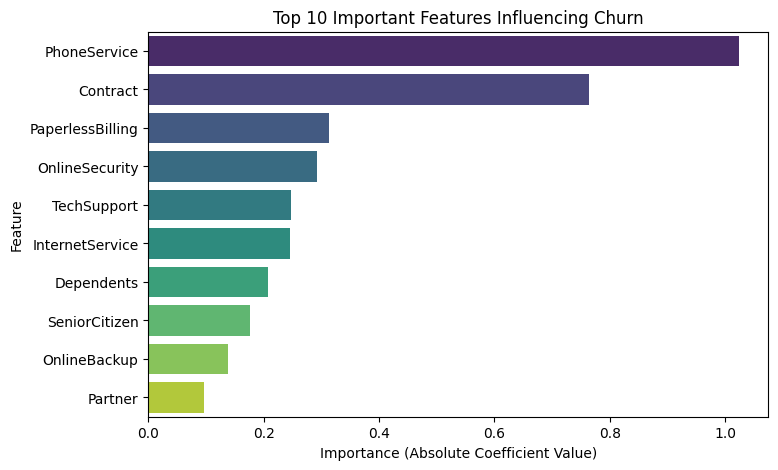

In [10]:
# Step 12: Feature Importance Visualization

import numpy as np

# Get feature importance (model coefficients)
importance = model.coef_[0]
features = X.columns

# Create dataframe for better visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': np.abs(importance)
}).sort_values(by='Importance', ascending=False).head(10)

# Plot top 10 important features
plt.figure(figsize=(8,5))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Important Features Influencing Churn")
plt.xlabel("Importance (Absolute Coefficient Value)")
plt.ylabel("Feature")
plt.show()
